<a href="https://colab.research.google.com/github/Shatadru281/Twitter-Sentiment-Analysis/blob/main/Twitterfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset safely
twitter_data = pd.read_csv("twitter_training.csv")
twitter_data = twitter_data.iloc[:10000]


# Ensure dataset has correct columns
expected_columns = ['ID', 'Keyword', 'Sentiment', 'Tweet']
if len(twitter_data.columns) < 4:
    print("Error: Dataset has incorrect column formatting!")
    exit()

# Assign correct column names
twitter_data.columns = expected_columns

# Drop null tweets
twitter_data.dropna(subset=['Tweet'], inplace=True)

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""  # Handle missing or non-string values

    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip spaces

    nltk.download('stopwords')  # Ensure stopwords are available
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply text cleaning
twitter_data['cleaned_tweet'] = twitter_data['Tweet'].apply(clean_text)

# Map sentiments to numerical values
sentiment_map = {'Negative': 0, 'Positive': 2, 'Neutral': 1, 'Irrelevant': 1}  # Treat 'Irrelevant' as 'Neutral'
twitter_data['Sentiment'] = twitter_data['Sentiment'].map(sentiment_map)

# Check if TF-IDF input is not empty
if twitter_data['cleaned_tweet'].isnull().sum() > 0:
    print("Warning: Some tweets are empty after cleaning.")

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X = vectorizer.fit_transform(twitter_data['cleaned_tweet'])
y = twitter_data['Sentiment'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train using SVM
svm_model = SVC(kernel='linear')  # Linear kernel for text classification
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train using Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate models
svm_acc = accuracy_score(y_test, y_pred_svm)
nb_acc = accuracy_score(y_test, y_pred_nb)

svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

# Print results
print(f"\n✅ SVM Accuracy: {svm_acc:.4f}, F1 Score: {svm_f1:.4f}")
print(f"✅ Naïve Bayes Accuracy: {nb_acc:.4f}, F1 Score: {nb_f1:.4f}")


Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-dat


✅ SVM Accuracy: 0.9039, F1 Score: 0.9040
✅ Naïve Bayes Accuracy: 0.8589, F1 Score: 0.8589


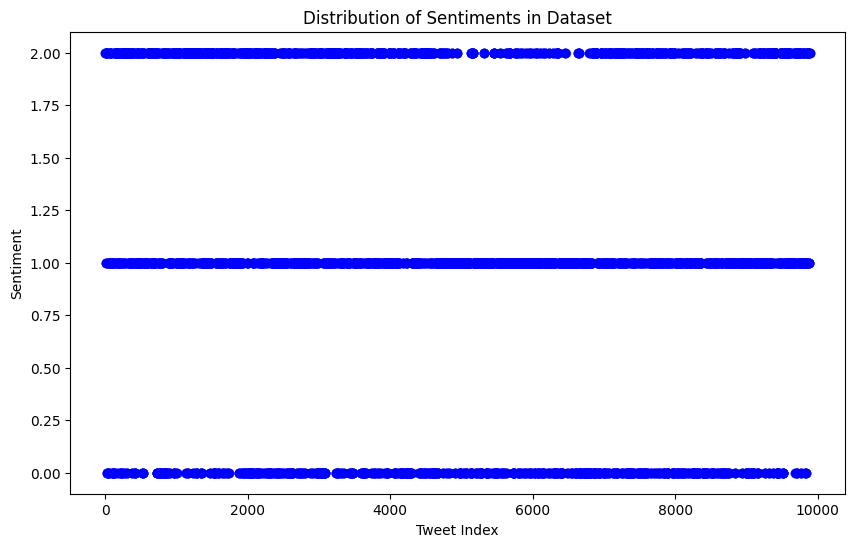

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(twitter_data)), twitter_data['Sentiment'], alpha=0.5, c='blue')
plt.title('Distribution of Sentiments in Dataset')
plt.xlabel('Tweet Index')
plt.ylabel('Sentiment')
plt.show()